# A DEMO Implementation
# Making use of the noncryptogrsphic package, pyhash.
# Using FNV, Metro and murmur hash functions. You can use whichever you please.


<html><body>
<b><em>1. An overview of the types of operations that a Bloom filter supports, and where Bloom filters might be useful.</em></b></body></html>

<p>Given a set of elements, a bloom filter can be used to infer the presence of any element in the set. It has some very weird answers though, if the element is not there, then it will tell you NO (Never will there be a FALSE NEGATIVE, phew!). If it is there (or not, Its all mystical), on the other hand, depending on some probabilities that I will discuss later, it will tell you MAYBE.(Just a fun fact, it is said that a Bloom Filter is like asking a girl on a date. NO means NO, that much is true, but a MAYBE can be either a YES or a NO. To be safe just keep your heart to yourself).</p>

<p>More detail on the MAYBE, when a Bloom Filter returns maybe, the implication could be that the element actually exists('TRUE POSITIVE' ), or it doesnt, but due to some overlap in hash return values in the bit array/table from which inferences and lookups are made, a FALSE POSITIVE when SEARCHING may be returned.  The upside of this uncertainty is space efficiency.</p>

<p>From the logic above, one can think of bloom filters as lighter manifestations of hash tables. In regards to operations, Bloom filters can perform efficient INSERTIONS and SEARCHES with one perk over hash tables hence why we refer to them as lightweight hash tables, they are SPACE EFFICIENT. </p>

<p>Given the properties above, one can infer the usefulness of Bloom filters. A key aspect to consider is the false positivity as it is what makes the data structure useless is some instances where utmost precision iss key regardless of space complexity. But in cases where we  <ol><li> Want to save on space and inevitably speed since we are cutting down on write operations and packet transfers.</p>
    </li><li>2. We can do with the False Positives: Bloom filters can help. an example is IP blocking systems or even browser page screens. In the IP case, blocked IPs can sometimes access a system. This is unwanted but for the most part managable using r-w-x permissions, capcha checks and tokens. But unblocked ones, true customers should never be blocked whatsoever. We also dont want to waste people's time authenticating, loading packets on the web since connectivity is slow in most of the world plus saving a list of IPS can cost too much space.</li></ol><p> For this reason, we can justify the occasional access by blocked IPs by the speed of access on our site and are sure we will well serve our clients. In regards to website screening, I would rather be warned that a site is not safe but it actually(Maybe because it does not have an ssl or uses http instead of https) instead of not being warned but the site be virus infected. Google's dynamic repo of unsafe sites is extensive but a number of them are in fact safe. Bloom filters here are useful in that when one seeks to access one of the safe sites, they can never be told it is unsafe as its id eg IP always hashes into the same values.  A safe site on the other hand when looked up may return a warning as Its ID may hash into values marked unsafe by other sites. This is okay since we are given the proceed option most of the time or just undergo a security check, maybe a captcha or something. Better safe than sorry. Bloom filters are very paramount in internet security for this reason.</p>



<html><body>
<b><em>2. An example implementation of a Bloom filter.</em></b></body></html>

In [13]:
#Non cryptographic hash functions package
import pyhash
import random
def bloomIPs(clientSize):
    """
    I will implement the IP blocker above example.
    For simplicity, lets assume our IP system is composed of values between
    0-100000
    """
    #My bit vector
    bitVector=[0]*clientSize

    """
    We use 3 hash functions, Murmur, FNV and metro hash systems. They are 
    non cryptographic hence will return the same value any time we pass in
    the same value. We modularize them by our bit  Vector size to make them
    fit into it as it is our reference sheet.
    """
    fnv=pyhash.fnv1_32()
    murmur=pyhash.murmur3_32()
    metro=pyhash.metro_128()

    """
    Now lets imagine we identified a set of just 1000 hackers in our world.
    Their IPs range from 0 to 1000 as follows.
    """
    hackerSize=1000
    hackersList=range(0,hackerSize)
    """
    To keep our random clients happy, we come up with a repo of all the 
    hackers Known. Our customers are very stubborn but they love being safe.
    Its a very dangerous world out there.
    We mark the hackers.
    """
    for hacker in hackersList:
        #Hash them with our 3 functions
        bitVector[fnv(str(hacker))%clientSize]=1
        bitVector[murmur(str(hacker))%clientSize]=1
        bitVector[metro(str(hacker))%clientSize]=1
    """
    Now our true clients make requests. We have say 100000 of them.
    We look them up in our list and determine if they are hackers or not
    An approved request is marked as Perfect. Lets count, of the 700,
    False Positives are clients Noted as Hackers
    How many will be marked perfect
    """
    perfect=0
    falsePositive=0
    for cust in range(0,100000):
        trueClient=random.randrange(10000,100000)
        check1= bitVector[fnv(str(trueClient))%clientSize]
        check2=bitVector[murmur(str(trueClient))%clientSize]
        check3=bitVector[metro(str(trueClient))%clientSize]
        #print("{}-{}-{}").format(check1,check2,check3)
        """
        We will not grant perfection to them if they are detected as hackers
        by any of our security systems, we mark the false positive.
        Othewise we just think of them as false negatives
        """
        checkFinale=(check1==check2==check3==1)
        if checkFinale is True:
            falsePositive+=1
        else:
            perfect+=1
    doc="""
    Running our check, we wil throw warnings to some true clients thinking
    they are hackers when they are in fact not. Run it again to see how
    many true clients connect. At least we know they are safe. But as seen.
    there is a possibility of our clients, whose IPs are not even in the
    same range as the hackers to be detected as hackers."""
    return {"hackerSize":hackerSize,"falsePositive":falsePositive,"clientSize":clientSize,"doc":doc,"perfect":perfect}
resNow=bloomIPs(10000)
print("**********WELCOME TO BRIAN'S WORLD***********")
print("Brian's world has a total of {} hackers").format(resNow["hackerSize"])
print("\n{} true customers were marked hackers:-(").format(resNow["falsePositive"])
print("But, {} true customers connected perfectly:-)").format(resNow["perfect"])
print(resNow["doc"])


**********WELCOME TO BRIAN'S WORLD***********
Brian's world has a total of 1000 hackers

1868 true customers were marked hackers:-(
But, 98132 true customers connected perfectly:-)

    Running our check, we wil throw warnings to some true clients thinking
    they are hackers when they are in fact not. Run it again to see how
    many true clients connect. At least we know they are safe. But as seen.
    there is a possibility of our clients, whose IPs are not even in the
    same range as the hackers to be detected as hackers.


<html><body>
<b><em>3. A description of the hash functions that your implementation uses.</em></b></body></html>

<html><body><ul>
<li><b><a href="http://www.jandrewrogers.com/2015/05/27/metrohash/">
Metro 128 hash: </a></b>
<td><p>This is a flavor of the metro class of hashing functions, non cryptographical hashing system that is designed for bulk hashing. Being algorithmicly generated, the original value can be generated by reverse engineering the hashing algorithm but the beauty of it is that a unique value will be generated for every of our inputs. This will be the case for all functions I use here. It supports incremental hashing thus very convenient for batch processing of large amounts of data that have some structure with them. In my IP example, this is beneficial. This is a primitive example but the idea is pretty apparent. If I had a sequence of say IDs for my clients in lieu of IPs, then I can fast compute their hash values based on the previous values and this can significantly increase processing speed thus allow for faster service delivery.</p></li>
<li><b>
<a href="https://en.wikipedia.org/wiki/Fowler%E2%80%93Noll%E2%80%93Vo_hash_function">
FNV1_32 HASH: </a></b>
<p>This is a flavor of the Fowler-Noll-Vo hash functions family. The algorithm as with all FNV hash family algorithms begins by creating an initisial non zero FNV offset basis. In my case, the basis will be a 32 bit value and it will be determined by the FNV prime as this is a pure FNV Implementation. The hash works as follows, each of the 32 bit values in the FNV offset basis, they are multiplied by the FNV prime then 'XORed' with the byte from the input. The FNV prime is a prime number that is determined by: Given an integer t that is less than 11 but greater than 4, n which is 2 exponent s is computed. t which is 5+ n all divided by 12 is also computer and the result is always truncated down. The n bit FNV prime is the smallest prime number p of the form 256^t +2^8+b such that 0 less than b less than 2^8.Wikipedia link in title)</p></li>
<li><b>
<a href="https://en.wikipedia.org/wiki/MurmurHash">
MURMUR 3_32 HASH: </a></b>
<p>
Just like my functions above, it also noncryptographic in that it can be reversed. It also begins with an initial value but does not multiply the 32 bit generated bit values by an FNV prime. It proceeds to XOR the bit generated value against four bit chunks.
</p></li>

</ul>
</body></html>

<html><body>
<b><em>4. Simple explanations for a general audience on how your implementation scales:</em></b></body></html>

<html><body>
<p>
Basically, I chose what we call incremental hashing algorithms. What these do is, if I hash say 1, then I get lets say a value A1, then I hash 2, and get a value A4, then hash 3 and get A7....etc. The idea is that the difference between values can be observed even in their hashes, in fact, the hash of the difference between subsequent values should be the same. This is for sure unsafe but the algorithms I use here are not meant for safety rather, they generate unique values that can facilitate very fast look ups.
</p>
<p>
A top up to this unique value generation is that we can easily compute hash values based on what we already have thus bulk hashing of values that are related say IPs is very easy. Sacaling such an algorithm thus will depend on the number of inputs and should generally involve topping up or reducing the hash value of the previously hashed value by the previously hashed one. This means the hashing speed scales linearly (Corresponding to the size of inputs).
</p>
</body></html>

<html><body>
<b><em>i) memory size as a function of the false positive rate.</em></b></body></html>

<html><body>
<p>
Now, the implementation will hash whatever value I have to the bit vector and generate a value within it. As the memory size increases, this means I can hold a larger bit vector. A larger bit vector on the other hand means I will have a lower rate of false positives since the modulation the hashing results by my values will be mapped to a larger range. The memory size n is inversely proportional to the number of false positives f on condition that the number if items stored is kept constant.
</p>
</body></html>

<html><body>
<b><em>ii) memory size as a function of the number of items stored.</em></b></body></html>

<html><body>
<p>
We can basically store as many items as our memory size. There is a direct proportionality between the memory size and the number of items we stored assuming we want to keep our false positive rate constant. The more items items we store, the more memory we need. 
</p>
<p>
If we are to allow for a changing false positive rate however, then we can store as many items in a table as we want meaning our memory size can stay constant regardless of how much items we are storing, we have constant memory usage, the size n of our bit vector and not the size of input.
</p>
</body></html>

<html><body>
<b><em>iii) access time as a function of the false positive rate.</em></b></body></html>

<html><body>
<p>
Our inference table being a vector, given any index, we can basically access the values directly. The  access time is going to depend on the number of hashing functions that we use with this being a direct proportionality. The more hashing functions, the less the likelihood of false positives however. The connection here is direct in that if we want to access things faster, we need less hashing functions and thus less look ups. If we have less hashing we increase our rate of false positives. The access time implies more hashing functions thus the inverse proportionality holds and the false positive rate too scales down.
</p>
<p>
Should we fix the number of hashing functions and number of items stored however, then the access time should stay constant regardless of how our false positive rate scales. It doesnt mater if Its a massive array or a small one, which is basically how we vary our false positive rate in this case, the access time of an array is O(1) and should take constant time.
</p>
</body></html>

<html><body>
<b><em>iv)access time as a function of the number of items stored.</em></b></body></html>

<html><body>
<p>
The access time is entirely dependent on the number of hashing functions and their complexities which we assume to be constant for simplicity. It does not matter how many items we have syore, once our hash functions do their thing, give us indices that we have to look up, we will go directly to the indices in constant time and read the value regardless of whether we have a million stored values or 1. Access time should stay constant.
</p>
</body></html>

<html><body>
<b><em>5. Produce a plot to show that your implementation’s false positive rate matches the theoretically expected rate.</em></b></body></html>

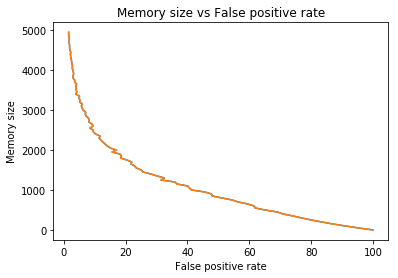

In [31]:
import matplotlib.pyplot as plt
"""
Holding the number of hackers constant, I would expect my false positive rate to 
increase as my bit array size gets smaller since well, the will be a lot of over lap.
Lets generate a list of different bit array(memory) sizes and text form the proportionality
of the false positives to our clientelle size, hackers included
I will top it out at 5000 since the past this the false positive rate is pretty low
"""
memSizes=[x for x in range(1,5000,50) ]
falseProp=[]
"""
Now to see the false positive proportions int he different memory sizes
"""

for pops in memSizes:
    resNow=bloomIPs(pops)
    falseProp.append(resNow["falsePositive"]/(1.0*resNow["clientSize"]+resNow["hackerSize"]))
#Plot memory against false positve rates
plt.plot(falseProp,memSizes)
plt.ylabel("Memory size")
plt.xlabel("False positive rate")
plt.title("Memory size vs False positive rate")
plt.show()